# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from scipy import optimize
import warnings
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Helps plotting graphs (source: BI-ML1, first notebook: 01_tutorial_cs_template)
%matplotlib inline

# Suppress scientific float notation (so 0.000 is printed as 0.)
np.set_printoptions(precision=5, suppress=True)

# Check dataset

* Look at number of columns and rows
    * columns: 22
    * rows: 2938
* Find types of datatypes
    * *object, int64, float64*
* Check how missing values are represented
    * *NaN*

In [2]:
# Load "LifeExpectancyData.csv" into data
df = pd.read_csv("LifeExpectancyData.csv")
print("First 10 records")
display(df.head(10))
print(f"-"*30)
print("Basic info")
display(df.info())
print(f"-"*30)
print("Number of uniques records")
display(df.nunique())
print(f"-"*30)
print("Number of null records")
display(df.isnull().sum())

First 10 records


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


------------------------------
Basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 no

None

------------------------------
Number of uniques records


Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

------------------------------
Number of null records


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Correlation matrix

<AxesSubplot:>

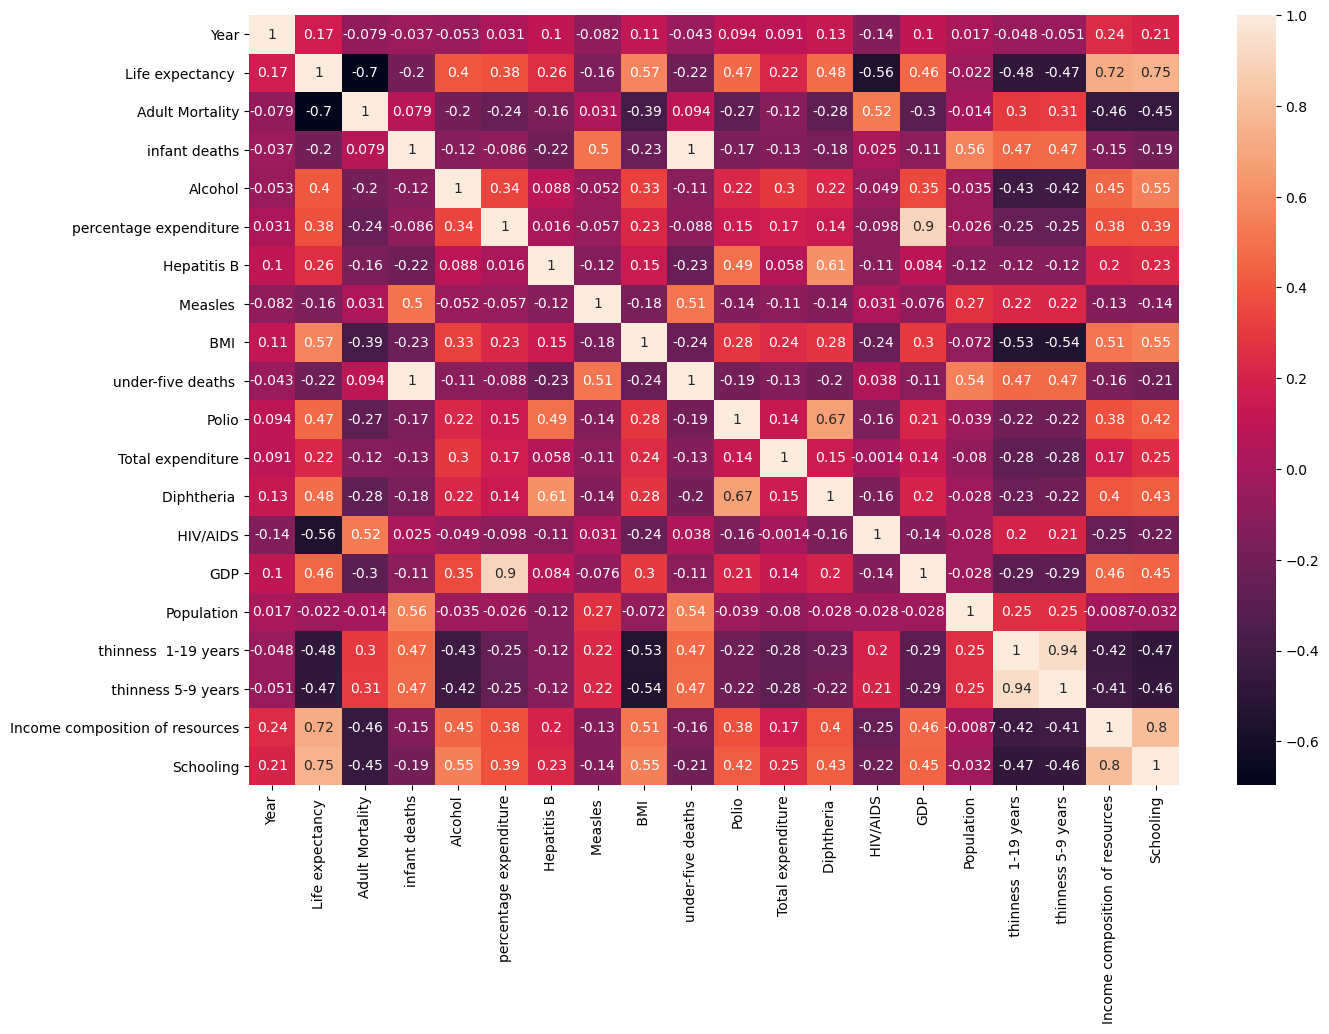

In [3]:
# Create correlation graph
fig, ax = plt.subplots(figsize=(15,10))
corelmat = df.corr()
sns.heatmap(corelmat, annot=True)

# Decide what columns we remove
I decided to remove **Population**, **thinness 1-19 years** and **thinness 5-9 years**
* **Population** <br>
    * This column has different values each year. Population doesnt change too much each year. <br>
        - 33 736 494 <br>
        - 327 582 <br>
        - 284 331 <br>
        - 2 729 431
* **thinness 1-19 years** and **thinness 5-9 years**
    * Thinness 1-19 years contains same information like thinness 5-9 years but has wider range of age. We can make 1 column with both information.

# Preparing dataset
* Decide what to do with whitespaces at the start and/or at the end of *column name*
    * Remove whitespaces
* Decide what to do with columns with wrong values 
    * Remove **Population**
* Decide what to do with **thinness 1-19 years** and **thinness 5-9 years**
    * Create new column **thinness** from the sum of **thinness 1-19 years** and **thinness 5-9 years**
    * Remove **thinness 1-19 years** and **thinness 5-9 years**
* Remove rows with missing explained variable
* Change object datatypes:
    * *Ordinal = object -> category -> use: cat.codes*
    * *Nominal = one-hot encoding -> use: pd.get_dummies()*
    * **Country** and **Status** are nominal
* Decide what to do with missing values
    * Change NaN values to median value of their columns

In [4]:
data = df.copy()

# Remove whitespace in column name
for col in data.columns:
    data.rename(columns = {col:col.strip()}, inplace=True)
print(data.columns)

# Remove 'Population' column
data = data.drop('Population', axis=1)

# Create new column 'thinness' and remove 'thinness 1-19 years' and 'thinness 5-9 years'
data["thinness"] = data["thinness  1-19 years"] + data["thinness 5-9 years"]
data = data.drop('thinness  1-19 years', axis=1)
data = data.drop('thinness 5-9 years', axis=1)

# Find and remove rows with missing explained variable
print(f"-"*40)
print("NaN in 'Life expectancy' before: ", data['Life expectancy'].isna().sum())
data = data[data['Life expectancy'].notna()]
print("NaN in 'Life expectancy' after: ", data['Life expectancy'].isna().sum())

# Get rid of object datatype
data = pd.get_dummies(data)

# Change NaN values to median of values from their columns
missisng_values = ['Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'thinness',
'Total expenditure', 'Diphtheria', 'GDP', 'Income composition of resources', 'Schooling',
'thinness']
sim = SimpleImputer(missing_values=np.nan, strategy='median')
display(data.loc[[32]])
for i in missisng_values:
    data[i] = sim.fit_transform(data[i].values.reshape(-1,1))
display(data.loc[[32]])

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
----------------------------------------
NaN in 'Life expectancy' before:  10
NaN in 'Life expectancy' after:  0


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
32,2015,75.6,19.0,21,NaN,0.0,95.0,63,59.5,24,...,0,0,0,0,0,0,0,0,0,1


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
32,2015,75.6,19.0,21,3.77,0.0,95.0,63,59.5,24,...,0,0,0,0,0,0,0,0,0,1


# Prepare explained variable and datasets

* Split data into train, validation and test datasets
    * split data: 60% train and 40% rest
    * split rest: 70% valid and 30% test

In [5]:
random_seed = 42

# Get rid of explained variable in Xdatasets and save explained variable to ydatasets
Xdata = data.drop("Life expectancy", axis = 1)
ydata = data['Life expectancy']

# Split data: 60% for train data, 40% rest
Xtrain, Xrest, ytrain, yrest = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed) 

# Split rest of data: 70% into valid and 30% test data
Xval, Xtest, yval, ytest = train_test_split(Xrest, yrest, test_size=0.3, random_state=random_seed) 

print(f"Xtrain: {Xtrain.shape}\nytrain: {ytrain.shape}")
print(f"Xval: {Xval.shape}\nyval: {yval.shape}")
print(f"Xtest: {Xtest.shape}\nytest: {ytest.shape}")

Xtrain: (1756, 202)
ytrain: (1756,)
Xval: (820, 202)
yval: (820,)
Xtest: (352, 202)
ytest: (352,)


### Prepare normalized data
Normalize with:
* StandardScaler
* MinMaxScaler

In [6]:
scaler_sc = StandardScaler().fit(Xtrain)
Xtrain_sc = scaler_sc.transform(Xtrain)
Xval_sc = scaler_sc.transform(Xval)
Xtest_sc = scaler_sc.transform(Xtest)

In [7]:
scaler_mm = MinMaxScaler().fit(Xtrain)
Xtrain_mm = scaler_mm.transform(Xtrain)
Xval_mm = scaler_mm.transform(Xval)
Xtest_mm = scaler_mm.transform(Xtest)

# Linear Regression
* Try adding new column
* Try normalized data
* Learn model
    * Use best parameter and fit to train dataset
* Show results
    * Plot graph
    * Show RMSE

Linear coefficients: [        0.28344        -0.00091         0.07497        -0.04196
         0.00018        -0.00541        -0.00001        -0.0027
        -0.05407         0.00344        -0.04391         0.00759
        -0.33421        -0.00002        -0.33403         0.10271
         0.01858 -67899988.80484 -67899971.64124 -67899973.76188
 -67899995.72477 -67899971.14518 -67899971.81444 -67899973.38891
 -31571616.47534 -31571615.85622 -67899976.26449 -67899972.26914
 -67899971.30075 -67899978.67469 -67899972.41567 -67899976.60624
 -31571616.20617 -67899977.19253 -67899988.53471 -67899981.17414
 -67899979.52991 -67899970.6614  -67899984.92729 -67899974.50858
 -67899970.6605  -31571624.17938 -67899989.00381 -67899989.25344
 -67899975.09777 -67899982.07832 -67899989.92542 -67899965.50346
 -67899994.20624 -67899992.85149 -67899967.55074 -67899975.33465
 -67899973.53167 -67899984.85087 -67899985.49535 -67899968.32235
 -31571621.16924 -67899969.20991 -31571617.04642 -31571620.16025
 -678

Text(0.5, 1.0, 'Test RMSE: Linear reg')

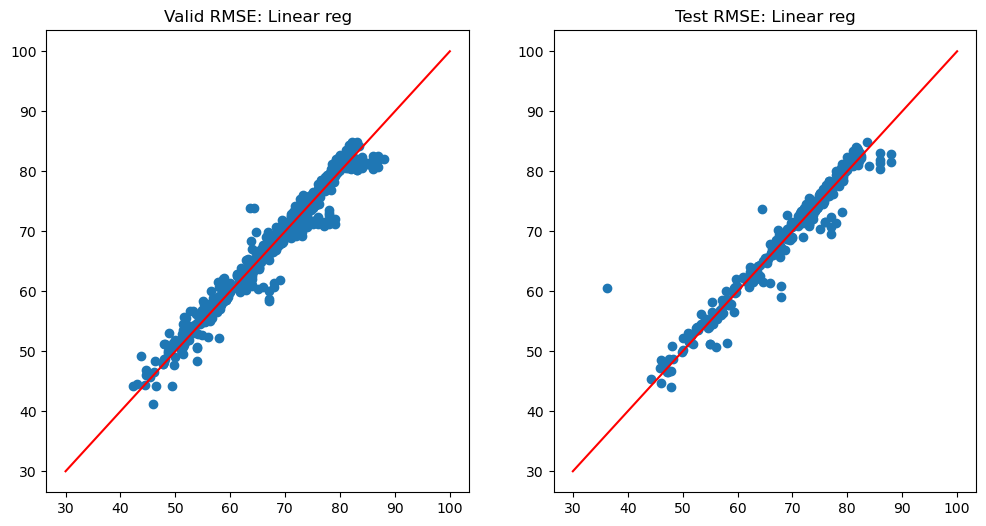

In [8]:
# Train our model
lin_reg = LinearRegression()
lin_reg.fit(Xtrain,ytrain)

# Linear coefficients are too big so we see just part of it
print(f"Linear coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")

# Predict VALID 'y' with our model
lin_val_pred = lin_reg.predict(Xval)

# Count RMSE and MAE
RMSE_val_lin = mean_squared_error(np.array(yval), lin_val_pred, squared=False)
MAE_val_lin = mean_absolute_error(np.array(yval), lin_val_pred)
print(f'Valid RMSE: {RMSE_val_lin:.5f}')
print(f'Valid MAE: {MAE_val_lin:.5f}')

# Predict TEST 'y' with our model
lin_test_pred = lin_reg.predict(Xtest)

print(f'Test RMSE: {mean_squared_error(np.array(ytest), lin_test_pred, squared=False):.5f}')
print(f'Test MAE: {mean_absolute_error(np.array(ytest), lin_test_pred):.5f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(yval, lin_val_pred)
ax1.plot([30,100], [30,100], 'r')
ax1.set_title("Valid RMSE: Linear reg")
ax2.scatter(ytest, lin_test_pred)
ax2.plot([30,100], [30,100], 'r')
ax2.set_title("Test RMSE: Linear reg")

### Linear reg with new column
* Create new column based on sum of **Income composition of resources** and **Schooling**
* **Income composition of resources**
    * Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling**
    * Number of years of Schooling(years)

Valid RMSE: 1.81396
Valid MAE: 1.17677


Text(0.5, 1.0, 'Valid RMSE: Linear reg with StandardScaler')

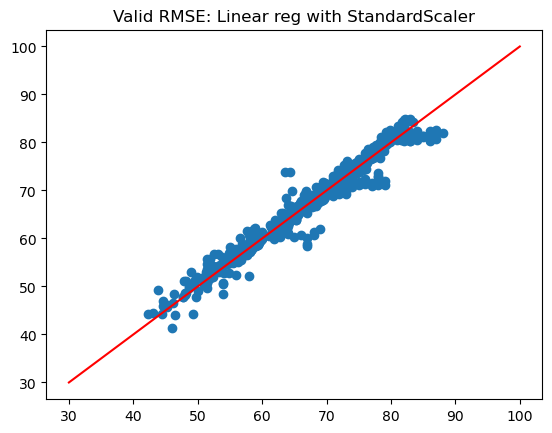

In [9]:
# Create new columns based on sum of infant deaths and under-five deaths
Xtrain_nc = Xtrain.copy()
Xtrain_nc["new_col"] = Xtrain_nc["Income composition of resources"] + Xtrain_nc["Schooling"]
Xval_nc = Xval.copy()
Xval_nc["new_col"] = Xval_nc["Income composition of resources"] + Xval_nc["Schooling"]

# Train our model
lin_reg_nc = LinearRegression()
lin_reg_nc.fit(Xtrain_nc, ytrain)

# Predict VALID 'y' with our model
lin_val_pred_nc = lin_reg_nc.predict(Xval_nc)

# Count RMSE and MAE
RMSE_val_lin_nc = mean_squared_error(np.array(yval), lin_val_pred_nc, squared=False)
MAE_val_lin_nc = mean_absolute_error(np.array(yval), lin_val_pred_nc)
print(f'Valid RMSE: {RMSE_val_lin_nc:.5f}')
print(f'Valid MAE: {MAE_val_lin_nc:.5f}')

plt.scatter(yval, lin_val_pred_nc)
plt.plot([30,100], [30,100], 'r')
plt.title("Valid RMSE: Linear reg with StandardScaler")

### Linear reg with normalized data (StandardScaler)

Linear coefficients: [ 1.31505e+00 -1.10883e-01  9.17299e+00 -1.64833e-01  3.66831e-01
 -1.26362e-01 -1.12598e-01 -5.33659e-02 -9.10480e+00  8.05833e-02
 -1.08309e-01  1.83845e-01 -1.69271e+00 -3.16403e-01 -6.81444e-02
  3.35547e-01  1.62111e-01 -1.71549e+11 -1.71549e+11 -1.79126e+11
 -1.46424e+11 -1.63613e+11 -1.71549e+11 -1.37006e+11 -3.13672e+11
 -3.28887e+11 -1.71549e+11 -1.46424e+11 -1.55261e+11 -1.71549e+11
 -1.37006e+11 -1.46424e+11 -3.13672e+11 -1.55261e+11 -1.26879e+11
 -1.37006e+11 -1.15857e+11 -1.63613e+11 -1.46424e+11 -1.46424e+11
 -1.71549e+11 -3.70716e+11 -1.37006e+11 -1.46424e+11 -1.46424e+11
 -1.71549e+11 -1.55261e+11 -1.46424e+11 -1.71549e+11 -1.37006e+11
 -1.55261e+11 -1.55261e+11 -1.93367e+11 -1.37006e+11 -1.46424e+11
 -1.71549e+11 -2.62662e+11 -1.79126e+11 -3.13672e+11 -3.13672e+11
 -1.26879e+11 -1.71549e+11 -1.86387e+11 -2.80717e+11 -1.55261e+11
 -1.71549e+11 -1.46424e+11 -1.37006e+11 -1.71549e+11 -1.26879e+11
 -1.63613e+11 -1.63613e+11 -1.79126e+11 -1.46424e+11 -1

Text(0.5, 1.0, 'Test RMSE: Linear reg with StandardScaler')

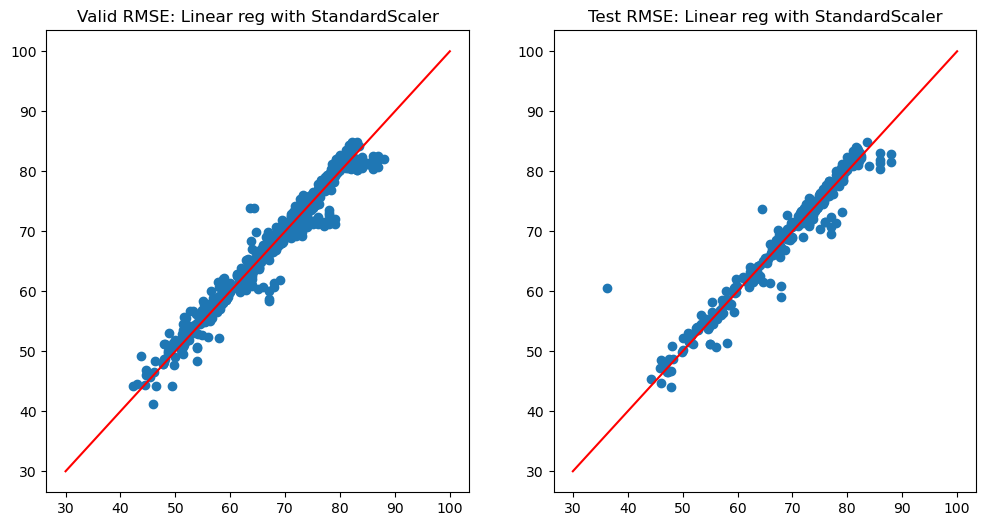

In [10]:
# Train our model
lin_reg_sc = LinearRegression()
lin_reg_sc.fit(Xtrain_sc,ytrain)

# Linear coefficients are too big so we see just part of it
print(f"Linear coefficients: {lin_reg_sc.coef_}")
print(f"intercept {lin_reg_sc.intercept_}")

train_pred_sc = lin_reg_sc.predict(Xtrain_sc)

RMSE_train_lin_sc = mean_squared_error(np.array(ytrain), train_pred_sc, squared=False)
MAE_train_lin_sc = mean_absolute_error(np.array(ytrain), train_pred_sc)
print(f'Train RMSE: {RMSE_train_lin_sc:.5f}')
print(f'Train MAE: {MAE_train_lin_sc:.5f}')

lin_val_pred_sc = lin_reg_sc.predict(Xval_sc)

RMSE_val_lin_sc = mean_squared_error(np.array(yval), lin_val_pred_sc, squared=False)
MAE_val_lin_sc = mean_absolute_error(np.array(yval), lin_val_pred_sc)
print(f'Train RMSE: {RMSE_val_lin_sc:.5f}')
print(f'Train MAE: {MAE_val_lin_sc:.5f}')

lin_test_pred_sc = lin_reg_sc.predict(Xtest_sc)

RMSE_test_lin_sc = mean_squared_error(np.array(ytest), lin_test_pred_sc, squared=False)
MAE_test_lin_sc = mean_absolute_error(np.array(ytest), lin_test_pred_sc)
print(f'Train RMSE: {RMSE_test_lin_sc:.5f}')
print(f'Train MAE: {MAE_test_lin_sc:.5f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(yval, lin_val_pred_sc)
ax1.plot([30,100], [30,100], 'r')
ax1.set_title("Valid RMSE: Linear reg with StandardScaler")
ax2.scatter(ytest, lin_test_pred_sc)
ax2.plot([30,100], [30,100], 'r')
ax2.set_title("Test RMSE: Linear reg with StandardScaler")

### Linear models comparisons

In [11]:
print(f'Valid RMSE: {RMSE_val_lin:.5f}')
print(f'Valid MAE: {MAE_val_lin:.5f}')
print(f"-"*30)
print(f'Valid RMSE with new column: {RMSE_val_lin_nc:.5f}')
print(f'Valid MAE with new column: {MAE_val_lin_nc:.5f}')
print(f"-"*30)
print(f'Valid RMSE with StandardScaler: {RMSE_val_lin_sc:.5f}')
print(f'Valid MAE with StandardScaler: {MAE_val_lin_sc:.5f}')

Valid RMSE: 1.81396
Valid MAE: 1.17677
------------------------------
Valid RMSE with new column: 1.81396
Valid MAE with new column: 1.17677
------------------------------
Valid RMSE with StandardScaler: 1.81405
Valid MAE with StandardScaler: 1.17689


### All linear models have almost same RMSE. I will use only classic linear model for other comparisons

In [12]:
def scatter_plot(y, pred, title):
    plt.scatter(y, pred)
    plt.plot([30,100], [30,100], 'r')
    plt.title(title)
    plt.show()

# Ridge regression
* Find best values for hyperparameters:
    * Number of alpha = {0.1, 400}
* Try normalized data
* Learn model
    * Use best parameter and fit to train dataset
* Show results
    * Plot graph
    * Show RMSE

### Looking for best hyperparamaters

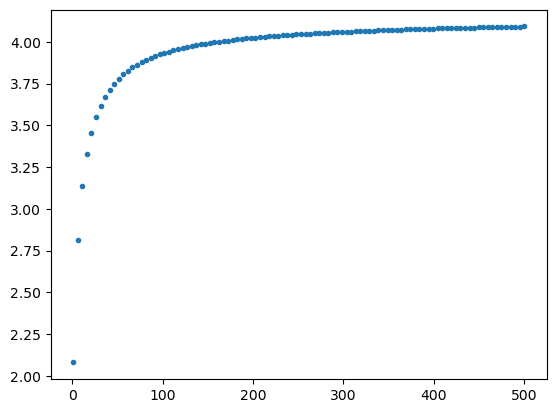

Best alpha 0.10021494245089224

Validační RMSE: 1.81575
Valid MAE: 1.17999
Testovací RMSE: 2.20421
Test MAE: 1.22679


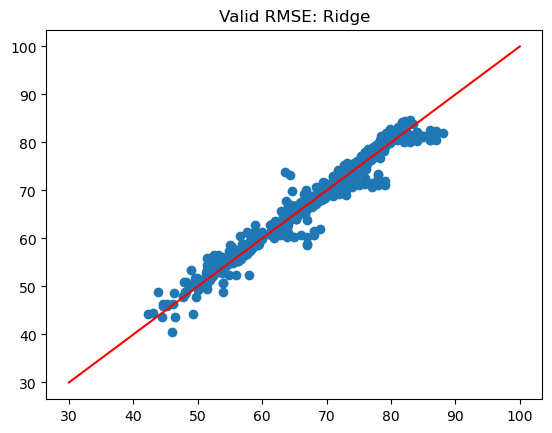

In [13]:
"""
The code will generate warnings because of
large and small values which are causing numerical problems
when training the model
"""
with warnings.catch_warnings(record=True):
    def ridge_best_model(Xtrain, Xval):
        # Try all alphas with our model
        def ridge_best_hyperparams(alpha):
            ridge_reg = Ridge(alpha=alpha)
            ridge_reg.fit(Xtrain, ytrain)
            ridge_pred = ridge_reg.predict(Xval)
            return mean_squared_error(yval, ridge_pred, squared = False)

        alphas = np.linspace(1,500,100)
        alphas_res = [ridge_best_hyperparams(alpha) for alpha in alphas]
        plt.plot(alphas, alphas_res, '.')
        plt.show()

        # Find best alpha 
        best_alpha = optimize.minimize_scalar(ridge_best_hyperparams, 
            options = {'maxiter': 30}, method = 'bounded', bounds=(0.1, 400))
        print(f"Best alpha {best_alpha.x}\n")

        # Return fitted model
        ridge_reg = Ridge(alpha = best_alpha.x)
        ridge_reg.fit(Xtrain, ytrain)
        return ridge_reg

    ridge_reg_best = ridge_best_model(Xtrain, Xval)

    # Predict VALID 'y' with best model
    ridge_val_pred = ridge_reg_best.predict(Xval)
    RMSE_val_ridge = mean_squared_error(yval, ridge_val_pred, squared = False)
    print(f'Validační RMSE: {RMSE_val_ridge:.5f}')
    print(f'Valid MAE: {mean_absolute_error(np.array(yval), ridge_val_pred):.5f}')

    pred_test_ridge = ridge_reg_best.predict(Xtest)
    RMSE_test_ridge = mean_squared_error(ytest, pred_test_ridge, squared = False)
    print(f'Testovací RMSE: {RMSE_test_ridge:.5f}')
    print(f'Test MAE: {mean_absolute_error(np.array(ytest), pred_test_ridge):.5f}')
    scatter_plot(yval, ridge_val_pred, "Valid RMSE: Ridge")

### Ridge with normalized data (StandardScaler)

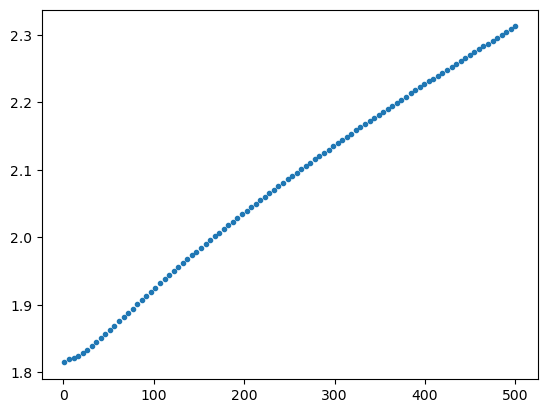

Best alpha 0.24243066322211496

Valid RMSE: 1.81222
Valid MAE: 1.17838
Test RMSE: 2.23343
Test MAE: 1.22120


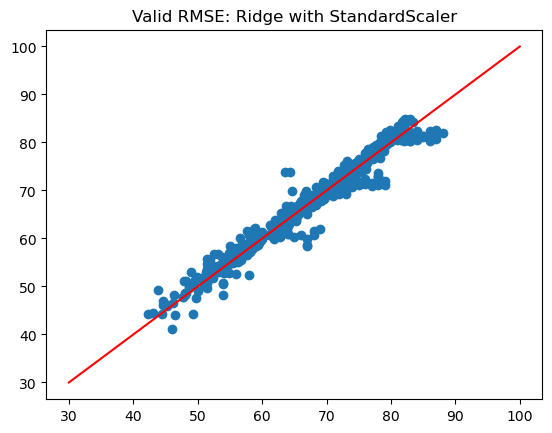

In [14]:
# Train and fit our model with normalized data
ridge_reg_best_sc = ridge_best_model(Xtrain_sc, Xval_sc)

# Predict VALID 'y' with best model
ridge_val_pred_sc = ridge_reg_best_sc.predict(Xval_sc)
RMSE_val_ridge_sc = mean_squared_error(yval, ridge_val_pred_sc, squared = False)
MAE_val_ridge_sc = mean_absolute_error(np.array(yval), ridge_val_pred_sc)
print(f'Valid RMSE: {RMSE_val_ridge_sc:.5f}')
print(f'Valid MAE: {MAE_val_ridge_sc:.5f}')

pred_test_ridge_sc = ridge_reg_best_sc.predict(Xtest_sc)
RMSE_test_ridge_stand = mean_squared_error(ytest, pred_test_ridge_sc, squared = False)
print(f'Test RMSE: {RMSE_test_ridge_stand:.5f}')
print(f'Test MAE: {mean_absolute_error(np.array(ytest), pred_test_ridge_sc):.5f}')

scatter_plot(yval, ridge_val_pred_sc, "Valid RMSE: Ridge with StandardScaler")

### Ridge with normalized data (MinMaxScaler)

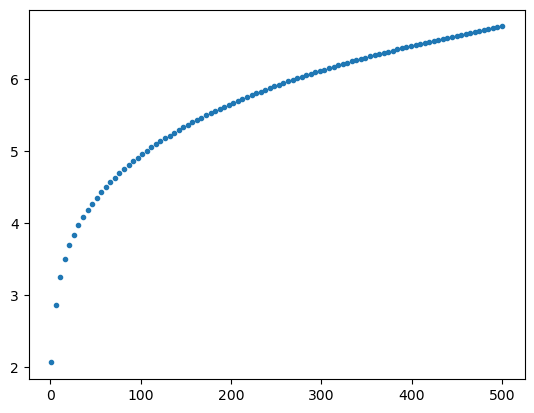

Best alpha 0.10021494245089224

Valid RMSE: 1.82679
Valid MAE: 1.19520
Test RMSE: 2.25281
Test MAE: 1.23445


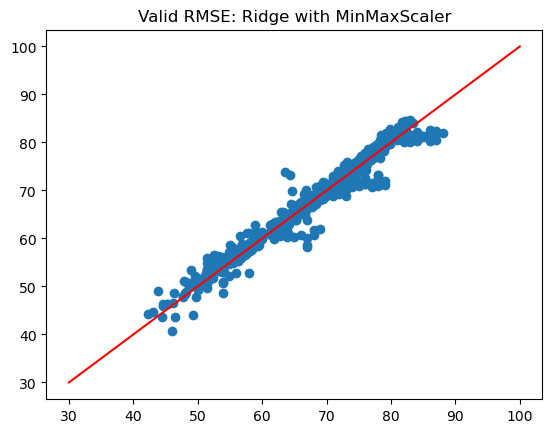

In [15]:
# Train and fit our model with normalized data
ridge_reg_best_mm = ridge_best_model(Xtrain_mm, Xval_mm)

# Predict VALID 'y' with best model
ridge_val_pred_mm = ridge_reg_best_mm.predict(Xval_mm)
RMSE_val_ridge_mm = mean_squared_error(yval, ridge_val_pred_mm, squared = False)
print(f'Valid RMSE: {RMSE_val_ridge_mm:.5f}')
print(f'Valid MAE: {mean_absolute_error(np.array(yval), ridge_val_pred_mm):.5f}')

pred_test_ridge_mm = ridge_reg_best_mm.predict(Xtest_mm)
RMSE_test_ridge_mm = mean_squared_error(ytest, pred_test_ridge_mm, squared = False)
print(f'Test RMSE: {RMSE_test_ridge_mm:.5f}')
print(f'Test MAE: {mean_absolute_error(np.array(ytest), pred_test_ridge_mm):.5f}')

scatter_plot(yval, ridge_val_pred_mm, "Valid RMSE: Ridge with MinMaxScaler")

### Ridge models comparisons

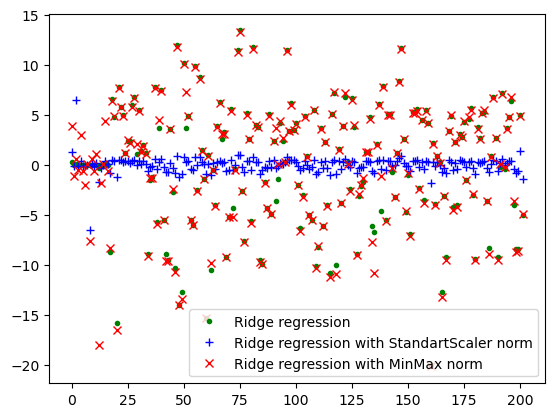

In [16]:
plt.plot(ridge_reg_best.coef_, 'g.', label="Ridge regression")
plt.plot(ridge_reg_best_sc.coef_, 'b+', label="Ridge regression with StandartScaler norm")
plt.plot(ridge_reg_best_mm.coef_, 'rx', label="Ridge regression with MinMax norm")
plt.legend()
plt.show()

### We can see from graph above that Ridge regression with StandardScaler data is best.

### Linear model and Ridge with StandardScaler model comparison

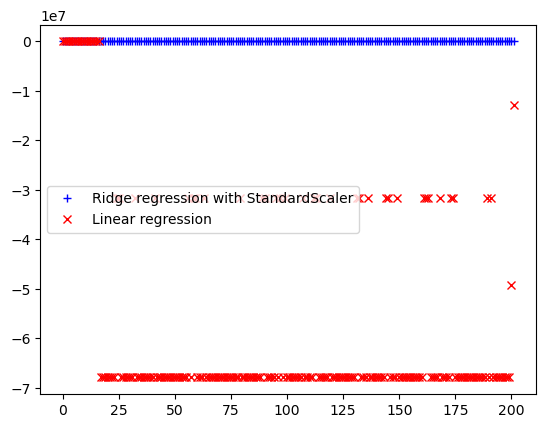

In [17]:
plt.plot(ridge_reg_best_sc.coef_, 'b+', label="Ridge regression with StandardScaler")
plt.plot(lin_reg.coef_, 'rx', label="Linear regression")
plt.legend()
plt.show()

# KNN
* Find best values for hyperparameters:
    * Number of neighbors = {1, 20}
* Learn model
    * Use best parameter and fit to train dataset
* Show results
    * Plot graph
    * Show RMSE

In [18]:
# Find best RMSE and number of neighbors for KNN
def get_neighbors(Xtrain, Xval):
    #Find best RMSE
    RMSE_val = []
    for k in range(1,20):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn_fit = knn.fit(Xtrain, ytrain)
        knn_pred = knn_fit.predict(Xval)
        knn_val = mean_squared_error(yval, knn_pred, squared=False)
        RMSE_val.append(knn_val)

    # Find best k
    for i in range(1,20):
        if RMSE_val[i] == np.min(RMSE_val):
            break
    
    # Return:
    # [0] -> best RMSE
    # [1] -> best number of neighbors
    return (np.min(RMSE_val), i)

KNN params:
	neighbor=1
KNN RMSE: 5.85178
KNN RMSE with StandardScaler: 2.00919
KNN RMSE with MinMaxScaler: 1.91838
KNN MAE with MinMaxScaler: 1.24646
Best neighbor: 1


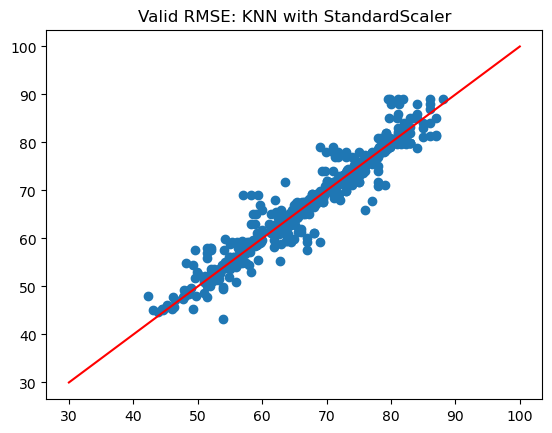

In [19]:
best_neighbor = get_neighbors(Xtrain_mm, Xval_mm)[1]
print(f"KNN params:\n\tneighbor={best_neighbor}")

# KNN
RMSE_knn = get_neighbors(Xtrain, Xval)[0]
print(f"KNN RMSE: {RMSE_knn:.5f}")

# KNN with normalized data by StandardScaler
RMSE_knn_sc = get_neighbors(Xtrain_sc, Xval_sc)[0]
print(f"KNN RMSE with StandardScaler: {RMSE_knn_sc:.5f}")

# KNN with normalized data by MinMaxScaler
RMSE_knn_mm = get_neighbors(Xtrain_mm, Xval_mm)[0]
print(f"KNN RMSE with MinMaxScaler: {RMSE_knn_mm:.5f}")

# Train our model with best number of neighbors
knn = KNeighborsRegressor(n_neighbors=best_neighbor)
knn_fit = knn.fit(Xtrain_sc, ytrain)
knn_pred = knn_fit.predict(Xval_sc)
MAE_knn_mm = mean_absolute_error(np.array(yval), knn_pred)
print(f"KNN MAE with MinMaxScaler: {MAE_knn_mm:.5f}")
print(f"Best neighbor: {best_neighbor}")

scatter_plot(yval, knn_pred, "Valid RMSE: KNN with StandardScaler")

# Decision tree
* Find best values for hyperparameters:
    * Number of depths = {1, 10}
* Learn model
    * Use best parameter and fit to train dataset
* Show results
    * Plot graph
    * Show RMSE

Decision tree params:
	depth=7
	criterion=squared_error
Decision tree RMSE: 2.8426
Decision tree MAE: 1.96172


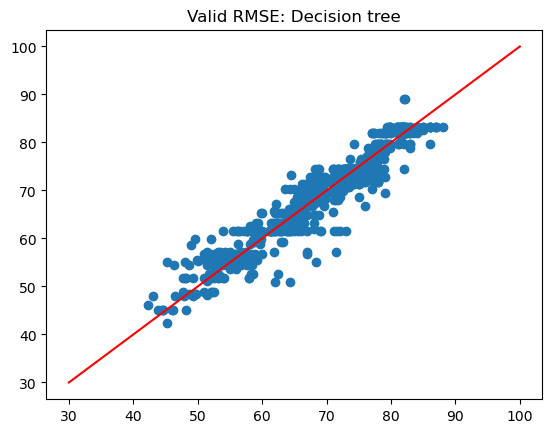

In [20]:
# Find best RMSE
valid_acc = []
crit = 'squared_error'
for i in range(1,10):
        dec_tree = DecisionTreeRegressor(max_depth=i, criterion=crit)
        dec_tree_fit = dec_tree.fit(Xtrain_sc, ytrain)
        dec_tree_pred = dec_tree_fit.predict(Xval_sc)
        RMSE_dec_tree_val = mean_squared_error(yval, dec_tree_pred, squared=False)
        valid_acc.append(RMSE_dec_tree_val)

# Find best depth
for depth in range(1,20):
    if valid_acc[depth] == np.min(valid_acc):
        break

# Train our model with best depth
dec_tree = DecisionTreeRegressor(max_depth=depth, criterion='squared_error')
dec_tree_fit = dec_tree.fit(Xtrain_sc, ytrain)
dec_tree_pred = dec_tree_fit.predict(Xval_sc)
RMSE_dec_tree_val = mean_squared_error(yval, dec_tree_pred, squared=False)
MAE_dec_tree = mean_absolute_error(np.array(yval), dec_tree_pred)
print(f"Decision tree params:\n\tdepth={depth}\n\tcriterion={crit}")
print(f"Decision tree RMSE: {RMSE_dec_tree_val:.5}")
print(f"Decision tree MAE: {MAE_dec_tree:.5f}")

scatter_plot(yval, dec_tree_pred, "Valid RMSE: Decision tree")

# Best model?

In [21]:
print(f'Valid RMSE by Linear regression: {RMSE_val_lin:.5f}')
print(f'Valid MAE by Linear regression: {MAE_val_lin:.5f}')
print(f"-"*30)
print(f'Valid RMSE by Ridge with StandardScaler: {RMSE_val_ridge_sc:.5f}')
print(f'Valid MAE by Ridge with StandardScaler: {MAE_val_ridge_sc:.5f}')
print(f"-"*30)
print(f"Valid RMSE by KNN with MinMaxScaler: {RMSE_knn_mm:.5f}")
print(f"Valid MAE by KNN with MinMaxScaler: {MAE_knn_mm:.5f}")
print(f"-"*30)
print(f"Valid RMSE by Decision tree: {RMSE_dec_tree_val:.5}")
print(f"Valid MAE by Decision tree: {MAE_dec_tree:.5f}")

Valid RMSE by Linear regression: 1.81396
Valid MAE by Linear regression: 1.17677
------------------------------
Valid RMSE by Ridge with StandardScaler: 1.81222
Valid MAE by Ridge with StandardScaler: 1.17838
------------------------------
Valid RMSE by KNN with MinMaxScaler: 1.91838
Valid MAE by KNN with MinMaxScaler: 1.24646
------------------------------
Valid RMSE by Decision tree: 2.8426
Valid MAE by Decision tree: 1.96172


### We can see that **Valid RMSE by Ridge with StandardScaler** is lower (not by much) than other RMSEs. Thats why I will pick this model for final prediction.
* Predict test data with picked model.

Test RMSE: 2.23343
Test MAE: 1.22120


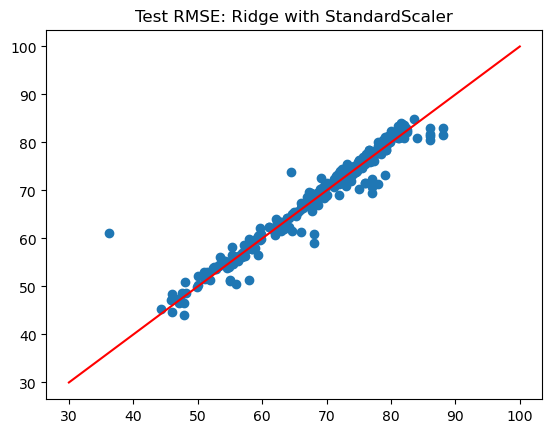

In [22]:
pred_test_ridge_sc = ridge_reg_best_sc.predict(Xtest_sc)
RMSE_test_ridge_sc = mean_squared_error(ytest, pred_test_ridge_sc, squared = False)
MAE_test_sc = mean_absolute_error(np.array(ytest), pred_test_ridge_sc)
print(f'Test RMSE: {RMSE_test_ridge_sc:.5f}')
print(f'Test MAE: {MAE_test_sc:.5f}')

scatter_plot(ytest, pred_test_ridge_sc, "Test RMSE: Ridge with StandardScaler")

### I expect on new data similar RMSE and MAE.